In [18]:
# Defino las condiciones del problema, resolviendo a mano
# la ecuación diferencial de segundo orden se puede escribir
# como un sistema para resolver recurrentemente de la forma
# Xk+1 = A . Xk + Bk
from numpy import *

def A(h: float) -> array:
    return array(
        [
            [1, h],
            [1.5 * h, 1 + 2.5 * h]
        ]
    )

def B(t0: float, h: float, k: int) -> array:
    return array(
        [0, 22.5 * h * exp(2 * (t0 + k * h))]
    )

def solve(X0, A, B, N, t0, h):
    t = array([t0 + i * h for i in range(N+1)])
    x = [X0]
    for i in range(1, N+1):
        value = A(h) @ x[i - 1] + B(t0, h, i - 1)
        x.append(value)
    return t, x

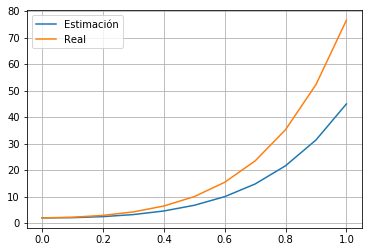

In [24]:
# Computo los resultados del problema. Luego calculo los valores reales y los ploteo para diferenciarlos
X0 = array([2, 1])
N = 10
h = 0.1
t0 = 0
t, x = solve(X0, A, B, N, t0, h)

# Computo los verdadores valores
xreal = 4 * exp(-0.5 * t) + 7 * exp(3 * t) - 9 * exp(2 * t)

# Ploteando
from matplotlib import pyplot

pyplot.plot(t, [v[0] for v in x], label="Estimación")
pyplot.plot(t, xreal, label="Real")
pyplot.grid()
pyplot.legend()
pyplot.show()